# Life Expectancy and GDP

This project looks into life expectancy from [World Health Organization](http://apps.who.int/gho/data/node.main.688) and GDP from [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Codecademy provided data and general guidelines for the project.

I visualize the data about the GDP of a country and the life expectancy of its citizens. For simplicity, I focus on six countries. I prepare, plot and analyze the data using Pandas, Seaborn and Matplotlib in Jupyter Notebook.

This project is created only for the purpose of learning how to use different visualizations. The data used is very limited so it is difficult to draw any conclusions about the relationship between GDP and life expectancy. Furthermore, even if there is any correlation found, we need to remember that correlation is different from causation. 

Due to my interest in economics and public health, I will later expand the project. I will look for a bigger dataset covering more countries. Furthermore, I will add additional features such as GDP per capita, inflation, demographics, etc. I will add this project to my Data Science portfolio found online.

### Step 1: Import necessary Python modules

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Step 2: Ingest the data

In [3]:
df = pd.read_csv('all_data.csv')

### Step 3: Examine The Data

In [33]:
print(df.head())
print('\n')
print('The countries included in the dataset are {}.'.format(', '.join(df.Country.unique())))
years_represented_set = set([str(year) for year in df.Year])
years_represented_list = sorted(list(year for year in years_represented_set))
print('The years included are {}.'.format(', '.join(years_represented_list)))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


The countries included in the dataset are Chile, China, Germany, Mexico, United States of America, Zimbabwe.
The years included are 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015.


In [36]:
df.rename(columns = {'Life expectancy at birth (years)': 'LEABY'}, inplace = True)
# print(df.head())

The dataset contains the following information:
- Country: There are six countries included.
- Year: The period covered is 2000 - 2015.
- Life expectancy at birth (years): The data is in years. The column is renamed to 'LEABY' for simplicity.
- GDP: The GDP values are in current US dollars.

### Step 4: Visualize the key features

<Axes: xlabel='Country', ylabel='GDP'>

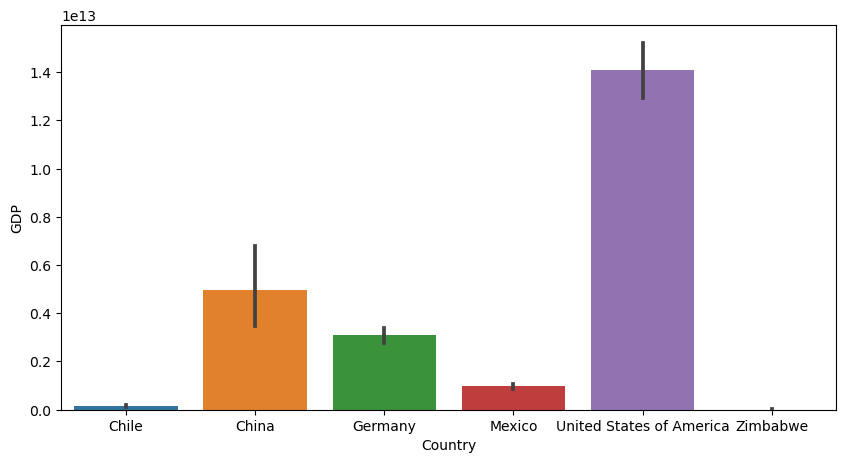

In [39]:
f, ax = plt.subplots(figsize = (10, 5))
sns.barplot(data = df, x = 'Country', y = 'GDP')

<Axes: xlabel='Country', ylabel='LEABY'>

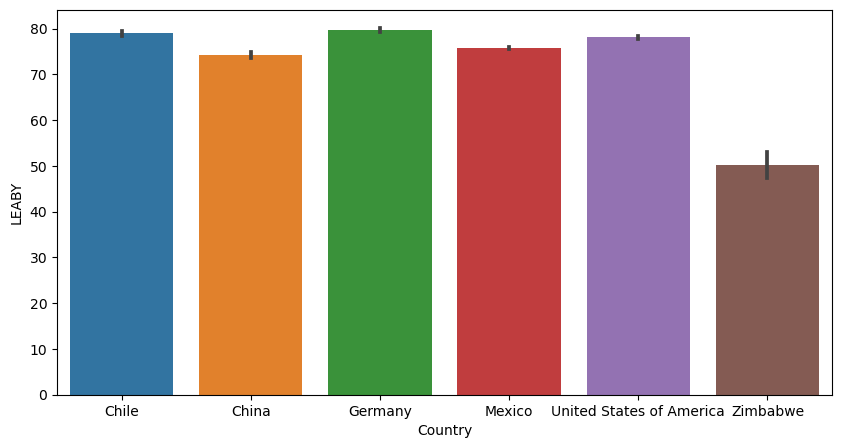

In [40]:
f, ax = plt.subplots(figsize = (10, 5))
sns.barplot(data = df, x = 'Country', y = 'LEABY')

Zimbabwe is the country with the lowest GDP and also the lowest life expectancy. We should note that the size of GDP and life expectancy depend on many factors. Thus, it's not surprising that there are very large differences between Chile and the USA in terms of GDP but not in terms of life expectancy.

### Step 5: Compare distribution of life expectancy

Text(0.5, 1.0, 'Life expectancy by Country')

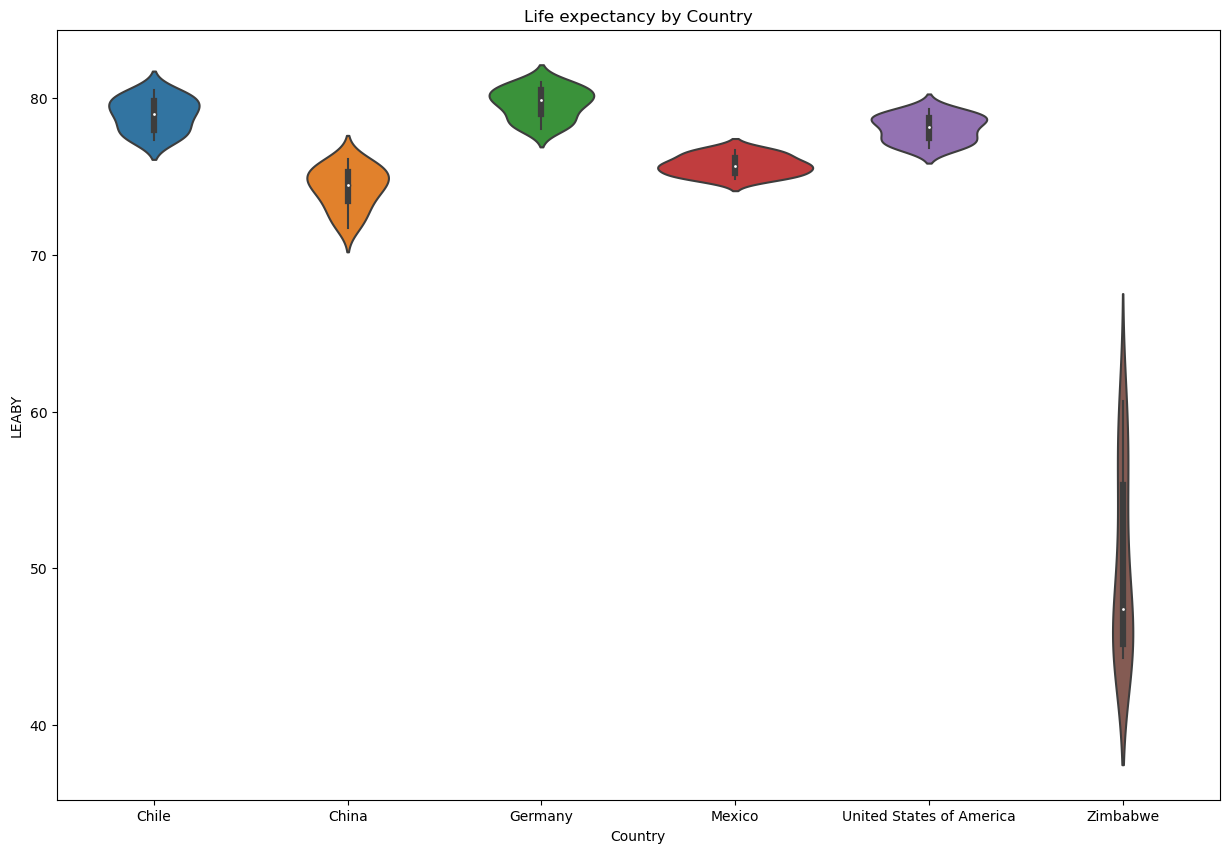

In [42]:
f, ax = plt.subplots(figsize=(15, 10)) 
sns.violinplot(data = df, x = 'Country', y = 'LEABY')
ax.set_title('Life expectancy by Country')

The plot compares the distributions of life expectancy for different countries over the entire period. The distribution for Zimbabwe is with the widest range. Its life expectancy seems to have changed the most over the years. I will examine this further in the following steps.

### Step 6: Plot GDP and Life Expectancy over time

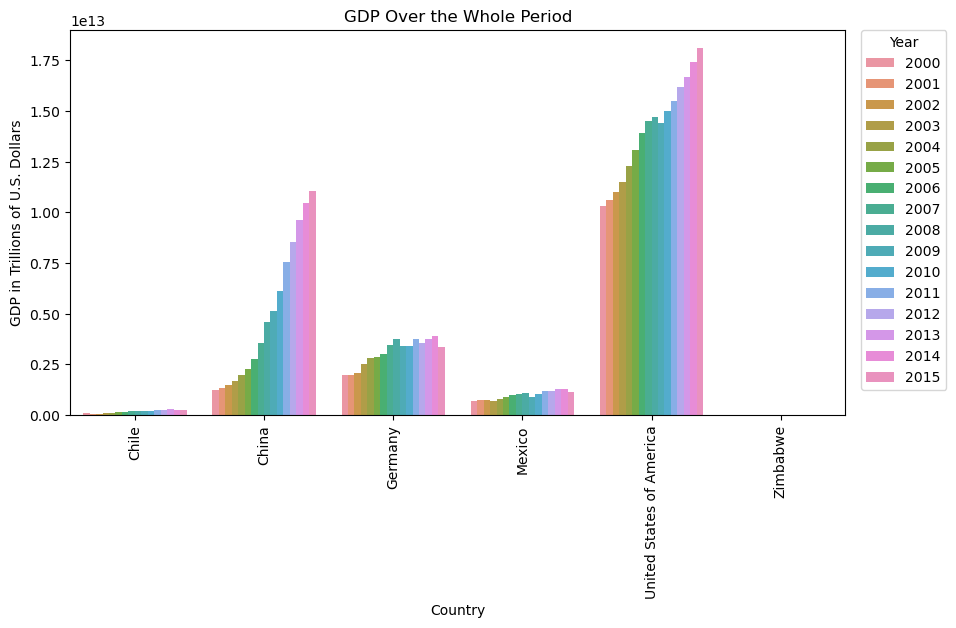

In [61]:
f, ax = plt.subplots(figsize=(10, 5)) 
ax = sns.barplot(data = df, x = 'Country', y = 'GDP', hue = 'Year')
plt.xticks(rotation = 90)
plt.ylabel('GDP in Trillions of U.S. Dollars')
ax.set_title('GDP Over the Whole Period')
plt.legend(bbox_to_anchor = (1.02, 1.00), loc = 'upper left', borderaxespad = 0, title = 'Year')

China has experienced the biggest increase in GDP which grew approximately five times in the period 2000 - 2015. It is also notable that the GDP of the USA, Germany and Mexico decreased significantly in 2009 while the GDP of China grew. In contrast, the GDP of Zimbabwe is so low that it cannot be displayed in a plot with this scale. Germany and Mexico seem to have the most volatile GDP which decreased in a few of the years covered.

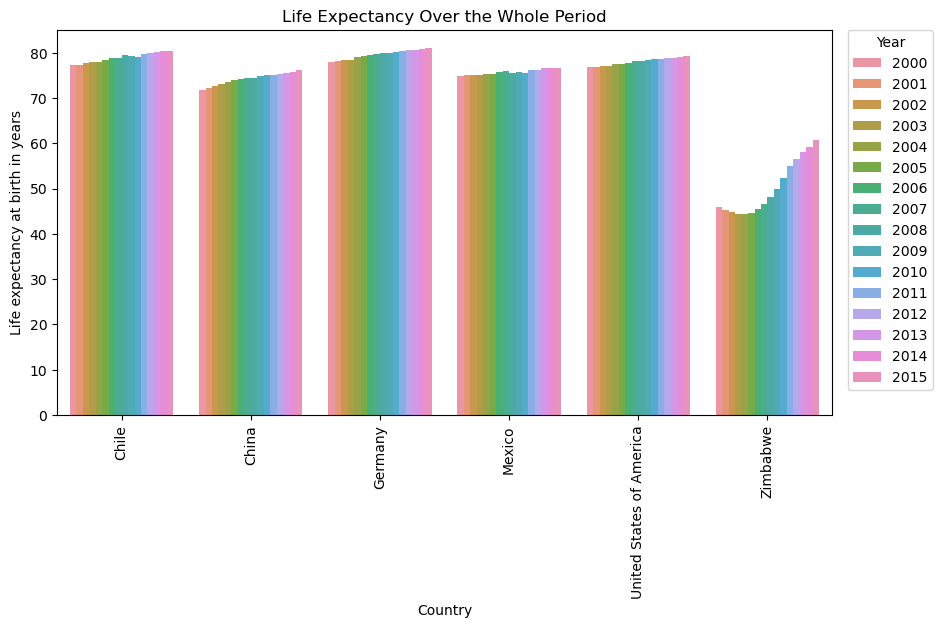

In [60]:
f, ax = plt.subplots(figsize=(10, 5)) 
ax = sns.barplot(data = df, x = 'Country', y = 'LEABY', hue = 'Year')
plt.xticks(rotation = 90)
plt.ylabel('Life expectancy at birth in years')
ax.set_title('Life Expectancy Over the Whole Period')
plt.legend(bbox_to_anchor = (1.02, 1.00), loc = 'upper left', borderaxespad = 0, title = 'Year')

Zimbabwe has the lowest life expectancy. In the early 2000s, it was around 40% lower compared to that of any other country. It was decreasing further up until 2005 when it started increasing. Life expectancy has been steadily increasing for almost all other countries. A few exceptions are small decreases in Chile and Mexico around 2009 and 2010. During the same period we saw a decrease in GDP for these countries. For China, Germany and the USA life expectancy seems to be increasing at a steady pace throughout the whole period.

### Step 7: Plots of GDP and life expectancy

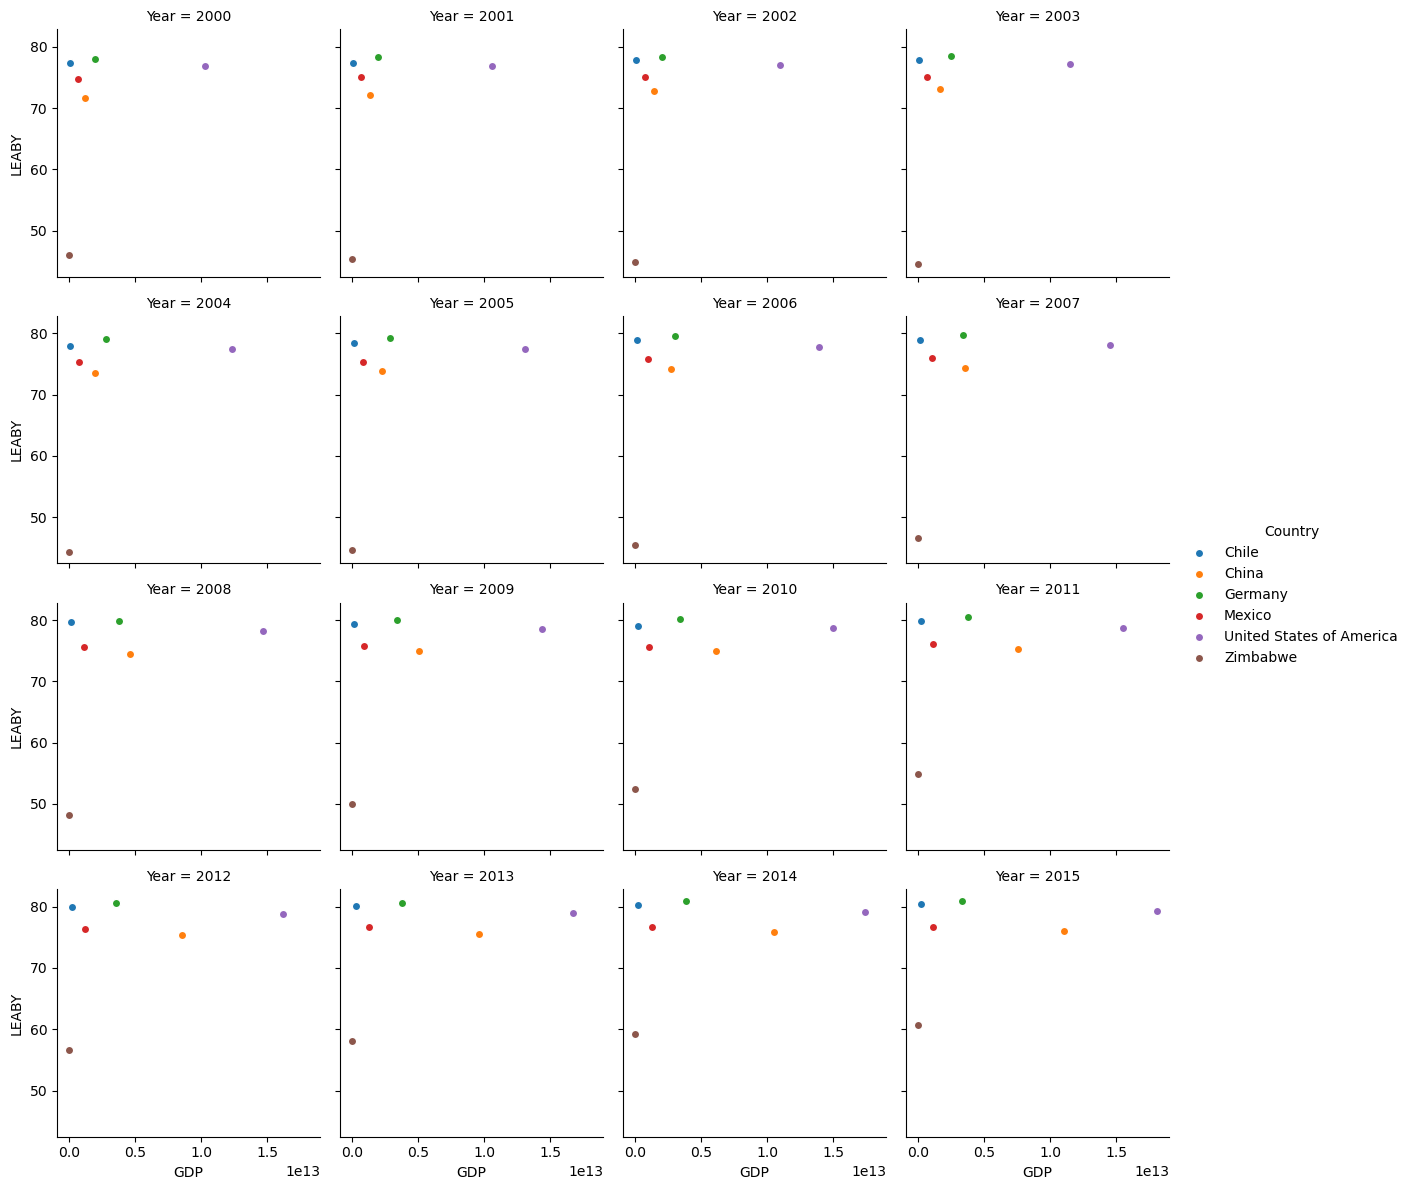

In [70]:
g = sns.FacetGrid(df, col = 'Year', hue = 'Country', col_wrap = 4)
g = (g.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend())

United States and China experience the highest increase in terms of GDP, and Zimbabwe the highest in terms of life expectancy. I used these scatterplots just to illustrate a different way to compare the data for the two keay features. However, in these plots it is difficult to isolate change over time. Thus, I will proceed with other types of visualizations such as line graphs by country over time.

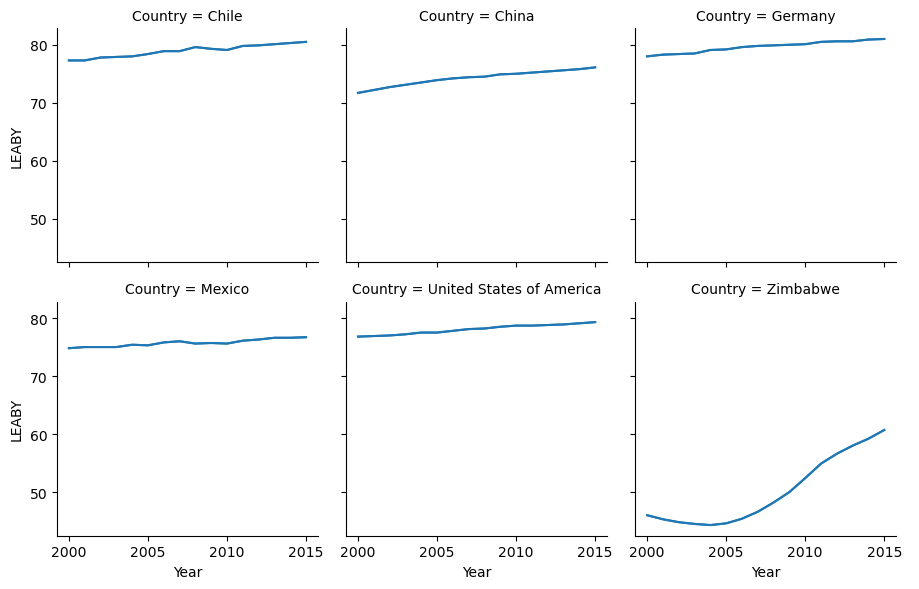

In [74]:
g2 = sns.FacetGrid(df, col="Country", col_wrap=3)
g2 = (g3.map(plt.plot, "Year", "LEABY").add_legend())

Again, it is evident that Zimbabwe is the country with the biggest change in life expectancy. After 2005 it started experiencing a steady increase. Other notables changes are the small decreases in the period 2009 - 2010 for both Chile and Mexico. Germany seems to have the highest life expectancy with the least change over time.

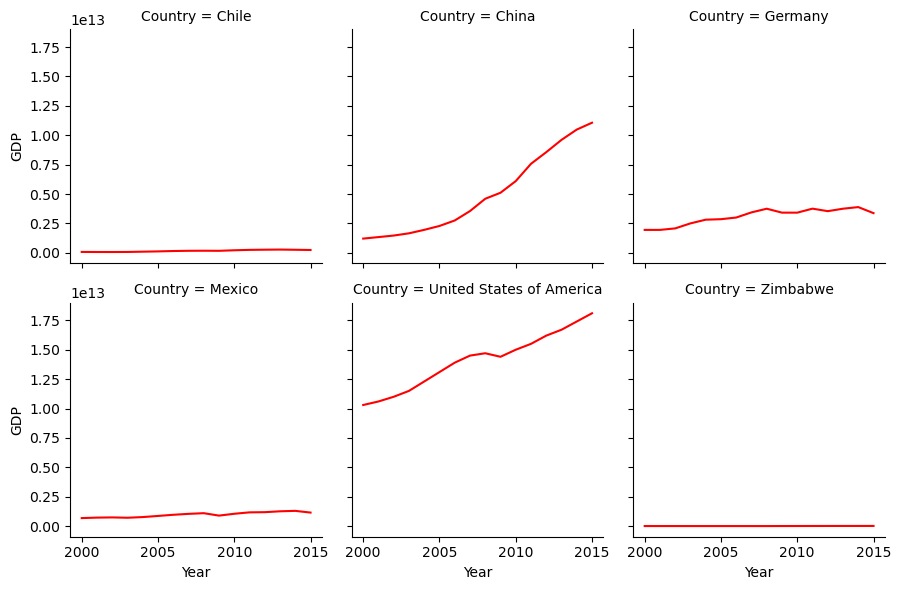

In [75]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3)
g3 = (g3.map(plt.plot, "Year", "GDP", color = 'red').add_legend())

The USA has by far the highest GDP while China has the highest increase in GDP. The GDP of Chile and Zimbabwe is too small to be displayed clearly on a graph with such scale.